In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os



In [3]:
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D , BatchNormalization , MaxPool2D ,Dense , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import segment

In [5]:

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (180,218,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "Adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 180, 218, 32)      320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 180, 218, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 109, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 109, 64)       18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 90, 109, 64)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 90, 109, 64)       256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 55, 64)       

In [6]:
from keras.models import load_model
model_tuberculosis = load_model('vgg16model_latest.h5')



In [7]:
img_widh=180
img_height=218
imgdat=segment.dat()
def get_data_new(path_given):
    data1=[]    
    
    for images in os.listdir(path_given):
        try:
            img=cv2.imread(os.path.join(path_given,images),cv2.IMREAD_GRAYSCALE)
            resizing=cv2.resize(img,(150, 150))
                
            data1.append(resizing)
        except Exception as e:
            print(e)
                
    return(np.array(data1))
        
    


ID_0029_Z_0059.tif
0.000755428
0.9992446
tumor detected


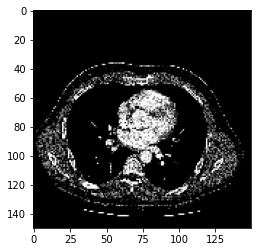

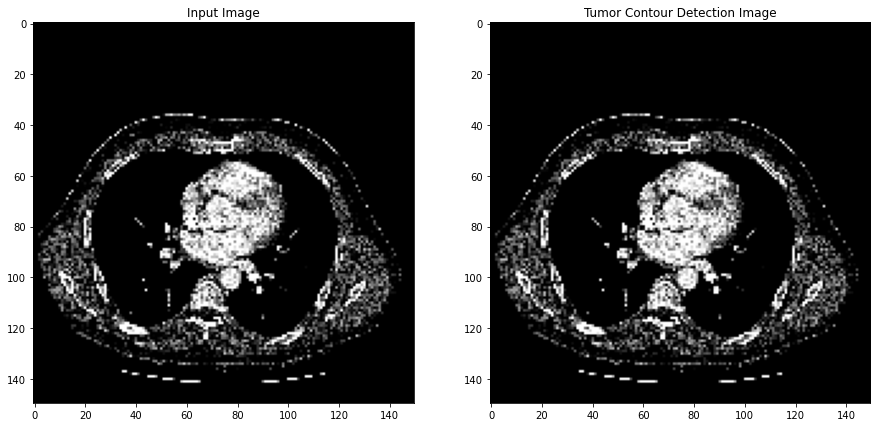

(22500, 3)


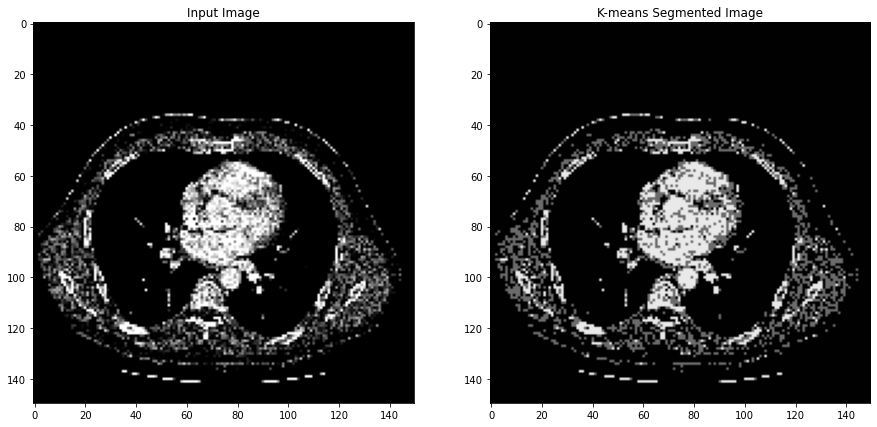

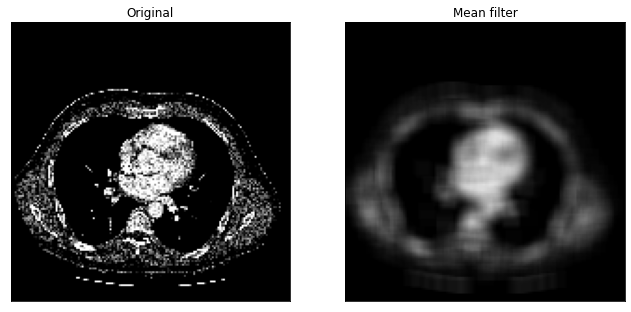

20.092911010705073


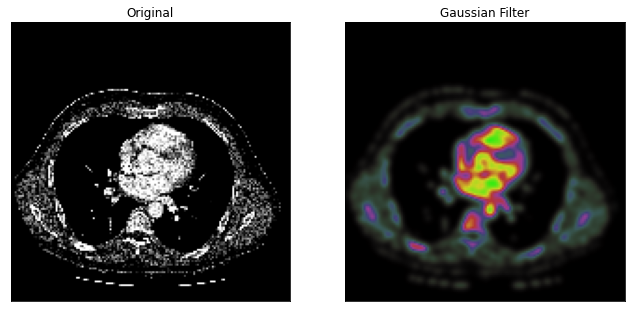

14.053173734939222


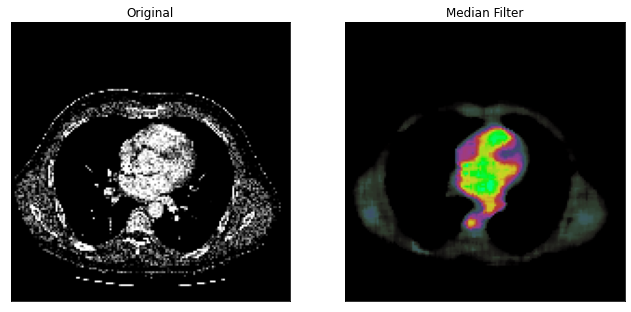

14.171887037510668


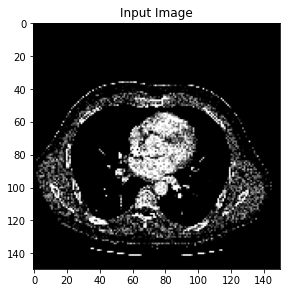

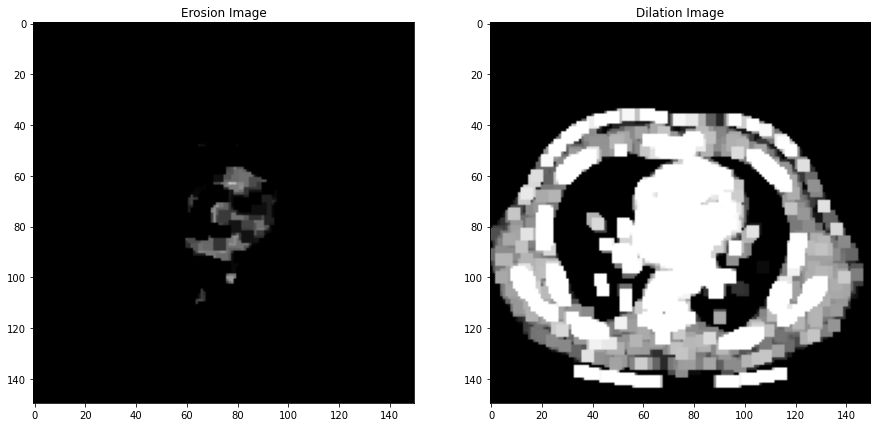

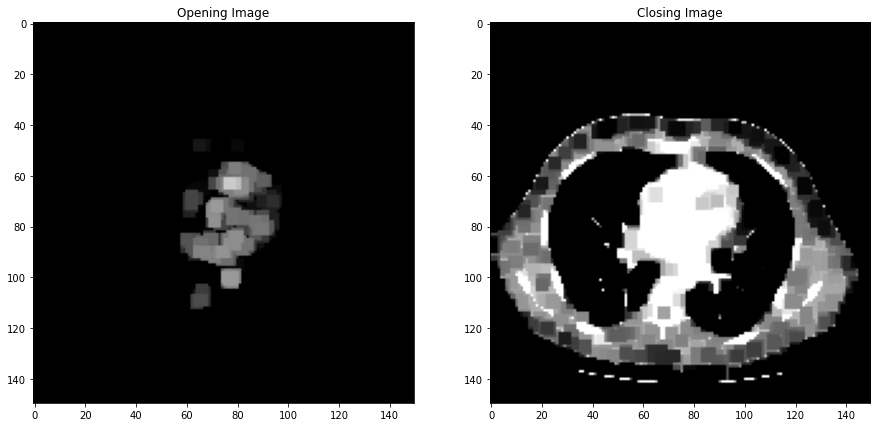

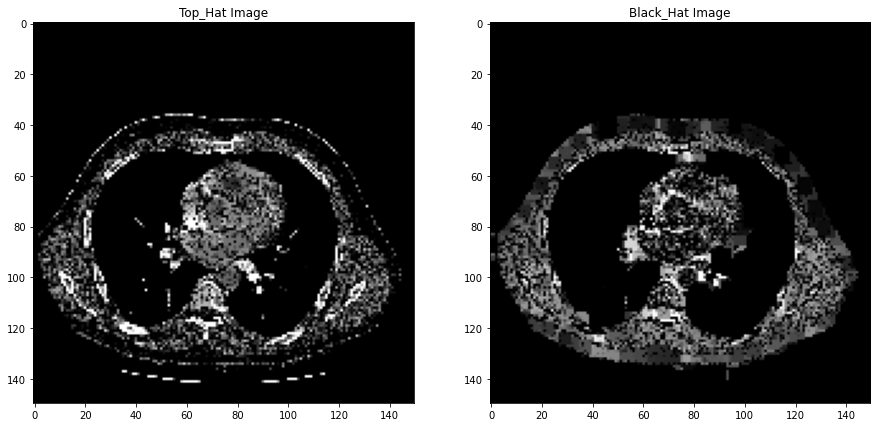

In [23]:
import numpy as np
from keras.preprocessing import image
foldername="input_image_check"
img_list=os.listdir(foldername)
for fileimg in img_list:
    print(fileimg)
    segm=2 if fileimg in imgdat else 0
    path="{}/{}".format(foldername,fileimg)
    img = image.load_img(path,target_size=(150, 150))
    img = np.asarray(img)
    plt.imshow(img)
    img1 = np.expand_dims(img, axis=0)
    from keras.models import load_model
    saved_model = load_model("vgg16model_latest.h5")
    output = saved_model.predict(img1)
    #output[0][0]= output[0][1]
    print(output[0][0])
    print(output[0][1])
    
    
    if output[0][0] > output[0][1] or segm>1 :
        print("no tumor detected")
        plt.imshow(img)
        
    else:
        print('tumor detected')
        #plt.imshow(img)
        import numpy as np
        from PIL import Image, ImageFilter
        from matplotlib import pyplot as plt
        #counter=img1.filter(ImageFilter.COUNTER)       
        f = plt.figure(figsize=(15,15))
        f.add_subplot(1, 2, 1).set_title('Input Image')
        plt.imshow(img)
        f.add_subplot(1, 2, 2).set_title('Tumor Contour Detection Image')
        plt.imshow(img)
        plt.show()
        import cv2
        import numpy as np
        import matplotlib.pyplot as plt
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # reshape the image to a 2D array of pixels and 3 color values (RGB)
        pixel_values = image.reshape((-1, 3))
        # convert to float
        pixel_values = np.float32(pixel_values)
        print(pixel_values.shape)

        # define stopping criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

        # number of clusters (K)
        k = 3
        _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # convert back to 8 bit values
        centers = np.uint8(centers)

        # flatten the labels array
        labels = labels.flatten()
        
        

        # convert all pixels to the color of the centroids
        segmented_image = centers[labels.flatten()]


        # reshape back to the original image dimension
        segmented_image = segmented_image.reshape(image.shape)


        # set up side-by-side image display
        fig = plt.figure()
        fig.set_figheight(15)
        fig.set_figwidth(15)

        fig.add_subplot(1,2,1).set_title('Input Image')
        plt.imshow(image, cmap='gray')

        # display the new image
        fig.add_subplot(1,2,2).set_title('K-means Segmented Image')
        plt.imshow(segmented_image, cmap='gray')

        plt.show(block=True)
        
        
        
        import numpy as np
        import cv2
        from matplotlib import pyplot as plt
        from PIL import Image, ImageFilter
        %matplotlib inline
        
        image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert to HSV
        figure_size = 9 # the dimension of the x and y axis of the kernal.
        new_image = cv2.blur(image,(figure_size, figure_size))
        plt.figure(figsize=(11,6))
        plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
        plt.xticks([]), plt.yticks([])
        plt.show()
        print(cv2.PSNR(image, new_image))



        new_image = cv2.GaussianBlur(img, (figure_size, figure_size),0)
        plt.figure(figsize=(11,6))
        plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
        plt.xticks([]), plt.yticks([])
        plt.show()
        print(cv2.PSNR(image, new_image))


        new_image = cv2.medianBlur(img, figure_size)
        plt.figure(figsize=(11,6))
        plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
        plt.xticks([]), plt.yticks([])
        plt.show()
        print(cv2.PSNR(image, new_image))


        import cv2
        import numpy as np
        from matplotlib import pyplot as plt
        from PIL import Image, ImageFilter

        #img = cv2.imread('Y_11.png',0)
        kernel = np.ones((5,5),np.uint8)
        erosion = cv2.erode(img,kernel,iterations = 1)
        dilation = cv2.dilate(img,kernel,iterations = 1)
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
        tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
        blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)


        f = plt.figure(figsize=(15,15))

        f.add_subplot(1, 3, 1).set_title('Input Image')
        plt.imshow(img)


        f = plt.figure(figsize=(15,15))
        f.add_subplot(1, 2, 1).set_title('Erosion Image')
        plt.imshow(erosion)
        f.add_subplot(1, 2, 2).set_title('Dilation Image')
        plt.imshow(dilation)
        plt.show()

        f = plt.figure(figsize=(15,15))
        f.add_subplot(1, 2, 1).set_title('Opening Image')
        plt.imshow(opening)
        f.add_subplot(1, 2, 2).set_title('Closing Image')
        plt.imshow(closing)
        plt.show()

        f = plt.figure(figsize=(15,15))
        f.add_subplot(1, 2, 1).set_title('Top_Hat Image')
        plt.imshow(tophat)
        f.add_subplot(1, 2, 2).set_title('Black_Hat Image')
        plt.imshow(blackhat)
        plt.show()

       

In [ ]:
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.title('Histogram of Input Image Before Equalization')
plt.hist(flat, bins=50)